# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 5 Simple Perceptron ##

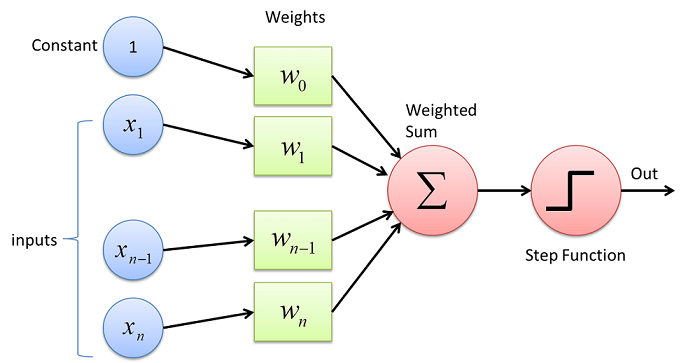


## Before We Begin ##

This lab is for you to understand simple perceptron. In this lab, we will learn how to implement Perceptron model from scratch. In the second part, we will apply the Perceptron model to different datasets.

## NumPy revision 

In the following Tasks, you may need the help of NumPy. So, let's have some review on how will NumPy help you do the calculation.
You can skip this section if you have no questions related to NumPy

In [1]:
import numpy as np

a=np.array([i for i in range(5)])
b=np.ones(5)
c=np.array([i for i in range(10)]).reshape(2,5)
d=np.array([i for i in range(10)]).reshape(5,2)
print(a)
print(b)
print(c)
print(d)

[0 1 2 3 4]
[1. 1. 1. 1. 1.]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [2]:
# vector elementwise multiply, add, and dot product
print(a+b)
print(a+9)
print(a*b)
print(a*9)
print(np.dot(a,b))

[1. 2. 3. 4. 5.]
[ 9 10 11 12 13]
[0. 1. 2. 3. 4.]
[ 0  9 18 27 36]
10.0


In [3]:
# vector elementwise math function
print(np.power(a,2))
print(np.sqrt(a))
print(np.log(b))

[ 0  1  4  9 16]
[0.         1.         1.41421356 1.73205081 2.        ]
[0. 0. 0. 0. 0.]


In [4]:
# matrix and vector sum 
print(np.sum(a))
print(np.sum(c))
print(np.sum(c, axis=0))
print(np.sum(c, axis=1))

10
45
[ 5  7  9 11 13]
[10 35]


In [5]:
# vector elementwise checking
print(a>0)
print((a>0)*1)

[False  True  True  True  True]
[0 1 1 1 1]


In [6]:
# matrix multiplication
print(np.matmul(c,a))
print(np.matmul(c,d))
print(np.matmul(d,c))
print(np.matmul(a,b))

[30 80]
[[ 60  70]
 [160 195]]
[[  5   6   7   8   9]
 [ 15  20  25  30  35]
 [ 25  34  43  52  61]
 [ 35  48  61  74  87]
 [ 45  62  79  96 113]]
10.0


In [7]:
#difference between .dot & .matmul, these two performs similar for 1d&2d array

x = np.array([i for i in range(18)]).reshape(2,3,3)
#(2,3,3)means a array with two elements, each elements is a 3*3 metrics
y = np.array([i for i in range(18)]).reshape(2,3,3)
#(2,3,3)means a array with two elements, each elements is a 3*3 metrics
z = (np.matmul(x,y))
z_ = np.dot(x,y)
print("x",x)
print("y",y)
print("matmul\n",z,z.shape)
#The matmul() function broadcasts the array like a stack of matrices as elements residing in the last two indexes, respectively.

#matmul will do: [first metrix * first metrix, second metrix * second metrix]. the dimension of metrixes need to be matched.
print("dot\n",z_,z_.shape)
#The numpy.dot() function, on the other hand, performs multiplication as the sum of products over the last axis of the first array and the second-to-last of the second
#dot will do: [
  #[
    #[first row of first metrix * first metrix, first row of first metrix * second metrix],
    #[second row of first metrix * first metrix, second row of first metrix * second metrix],
    #[third row of first metrix * first metrix, third row of first metrix * second metrix]
  #],
  #[
    #[first row of second metrix * first metrix, first row of second metrix * second metrix],
    #[second row of second metrix * first metrix, second row of second metrix * second metrix],
    #[third row of second metrix * first metrix, third row of second metrix * second metrix]
  #]
#]



x [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
y [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
matmul
 [[[ 15  18  21]
  [ 42  54  66]
  [ 69  90 111]]

 [[366 396 426]
  [474 513 552]
  [582 630 678]]] (2, 3, 3)
dot
 [[[[ 15  18  21]
   [ 42  45  48]]

  [[ 42  54  66]
   [150 162 174]]

  [[ 69  90 111]
   [258 279 300]]]


 [[[ 96 126 156]
   [366 396 426]]

  [[123 162 201]
   [474 513 552]]

  [[150 198 246]
   [582 630 678]]]] (2, 3, 2, 3)


In [8]:
# matrix and vector slice
print(a[1:])
print(a[:-1])
print(c[:,1])
print(c[:,-1])
print(c[1,:])
print(c[-1,:])
print(c[:,:-1])
#try more to learn about slicing

[1 2 3 4]
[0 1 2 3]
[1 6]
[4 9]
[5 6 7 8 9]
[5 6 7 8 9]
[[0 1 2 3]
 [5 6 7 8]]


# 1. The perceptron model

In this section, we mainly define the training process of a Perceptron model. To accomplish that, we need to do the following:

>1. Set initial weight and bias for perceptron 
>2. Predict the label with input variables, weight, and bias
>3. Update the weight and bias according to the "distance" between the predicted label and the true label
>4. Repeat the process __2__ and __3__ to do the training

You need to fill the TODOs to implement the Perceptron class, which can be reused for different datasets.

There are 3 functions in the model: `__init__`, `fit` and `predict`.<br>
>The `__init__` will help create the perceptron model and initialize the variables.<br>
>The `fit` will help train the perceptron model by updating variables in class with a given dataset.<br>
>The `predict` function will help calculate the value based on input and class variables, and then return the class label.




## Task 1.1

Initialize the __weights_and_bias__ inside the 'fit' function.

__weights_and_bias__ represent all trainable variables, including "weight", and “bias”. So that the vector length of __weights_and_bias__ should be: <br>
>1 + the vector length of a row in Training vector __X__.

Put all trainable parameters in one variable is useful when we want to pass, manage, and update them, especially highly related parameters (bias and weight will be used and updated simultaneously).



## Task 1.2

Define the training function __fit__, which will take __X__ and __Y__ as input to update __weights_and_bias__ for our perceptron model.

The __weights_and_bias__ should be updated according to the value of the data sample in __X__ and the difference between prediction and the true labels:

>1. predict the label with input features, and class variable __weighs_and_bias__
>2. update the __weight_and_bias__ according to the "distance" between the predicted label and true label
>3. repeat the process __1__ and __2__ to do the training

Please record the number of mismatching in each epoch to visualize the training process later: <br>
Checking the error terms __delta__ for each data sample, and putting the count of non-zero ones in each epoch into the error list __errors__. 
> E.g. There are 5 mismatching (__delta__ != 0) in the first epoch, and then we append __5__ to the __errors__.

As we mentioned in the review notebook, there are different rules to stop the training process. Please use the following rule to stop, instead of stopping when meet __max_epoch__.
* Stop when $accuracy$ is high enough. Similar to the above, we can count the accuracy level after each epoch. If the accuracy exceeds a certain number, stop the training process.

Specifically, we set the certain number as __0.98__, and reuse the number of mismatching in each epoch recorded above to calculate the accuracy.
>E.g. There are 5 mismatching (__delta__ != 0) in the first epoch, and there are __n__ data samples in X. Then the accuracy for the first epoch should be $1-\frac{5}{n}$.




## Task 1.3

Define the prediction function __predict__, which takes __X__ as input to calculate and return prediction. 

To do so, you should consider how perceptron uses weight and bias to predict the input label.

As the training process will update the __weights_and_bias__ by looking at each row in the training dataset,  we do not want to use a loop when predicting labels for all test datasets. 

Please utilize __.dot()/.matmul()__ function to achieve following:

>1. The prediction function can take both matrix and vector as input for __X__. 
>2. The return type of __prediction__ will change according to the type of input __X__ (i.e., a single value for vector input and vector type for matrix input).

If the __X__ is a matrix (2D array) while __weights_and_bias__ is an array: 

__X__: 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn} 
\end{bmatrix} 

__weights_and_bias__:
\begin{bmatrix}
    \theta \\
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}

Then, the calculation of prediction in matrix form will be like this:

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\ 
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn} 
\end{bmatrix}\cdot
\begin{bmatrix}
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}+
\begin{bmatrix}
    \theta\\      
    \theta\\    
    \vdots \\
    \theta     
\end{bmatrix}
=\begin{bmatrix}
    Y_{1}\\      
    Y_{2}\\    
    \vdots \\
    Y_{d}     
\end{bmatrix}$$

If If the __X__ is array while __weights_and_bias__ is a array: 

__X__: 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
\end{bmatrix} 

__weights_and_bias__:
\begin{bmatrix}
    \theta \\
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}

Then, the calculation of prediction in vector form will be like:

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
\end{bmatrix} \cdot
\begin{bmatrix}
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}+ \theta     
=Y_{1}$$

Try to use NumPy calculation to construct the function. 


In [9]:
import numpy as np

class MyPerceptron(object):
    def __init__(self,lr=0.01, epoch=10,in_weight=0.0):

        self.lr=lr  #learning rate
        self.epoch=epoch #the max epoch of training
        self.in_weight=in_weight # the initialization value of weights_and_bias


    def fit(self,X,Y):
        # Fit training data
        #X : Training vectors, X.shape : [#samples, #features]
        #Y : Target values, Y.shape : [#samples]

        #TODO:
        #Initialize the weights and bias according to in_weight and length of input data sample
        #initialize the weights and bias as a NumPy array. 
        #There are different ways to initialize them, i.e. from all 0, all 0.5, all 1, according to in_weight.

        self.weights_and_bias=np.full(1+X.shape[1],self.in_weight)

    
        #Initialize the list that records the number of misclassifications for each epoch
        self.errors=[]

        #TODO:
        #Update the __weights_and_bias__ according to the value of Data sample in dataset and difference between prediction and true labels
        #Record the number of misclassifications for each epoch
        i=0
        while i < self.epoch:
            count_err=0
            for xi,yi in zip(X,Y):
                delta=yi-self.predict(xi)
                self.weights_and_bias[1:]+=delta*self.lr*xi
                self.weights_and_bias[0]+=delta*self.lr
                count_err+=int(delta!=0)
            self.errors.append(count_err)
            if( 0.02>= count_err/X.shape[0]):
                break
            i+=1
            
            
        return self
    
    #TODO:
    #calculate the value based on weights and input to return the class label
    def predict(self,X):
        response=np.dot(X, self.weights_and_bias[1:])
        response=response+ self.weights_and_bias[0]
        prediction = (response>0)*1

        return prediction





# 2. Prepare the dataset

After preparing the model, we now have the "gun". It is time to build "bullets", and various datasets to try out the model.

The datasets we will use in this lab are the __Sonar__ dataset and the __Iris__ dataset.

The __Sonar__ dataset describes the information collected from a sonar system. The feature variables (those numbers between 0-1) are the strength of the signal from different angles, while the prediction variables (the letter __R__ or __M__) indicate the type of object. <br>
It is a binary classification that requires a perceptron model to differentiate __rocks__ from __metal__.

The __Iris__ dataset describes the information about 3 kinds of iris plants. The dataset contains 3 classes of 50 instances each. The feature variables (those numbers) are sepal length, sepal width, petal length and petal width, while the prediction variables (the texts) indicate the type of iris plant. <br>
We will take 2 classes of them as a binary classification that requires a perceptron model to predict.



Run the following code to load the sonar dataset.

In [10]:
import pandas as pd
dataset1= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', index_col=False, header=None)
dataset1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M




Run the following code to load the iris dataset.

In [11]:
import pandas as pd
#dataset= pd.read_csv('iris.csv', index_col=False, header=None)
dataset2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset2=dataset2[:100]
dataset2

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


## Vector representation transformation 
As we can see, the data inputs are in __float__ format, while labels are in __string__ format. To utilize them to build a model, we need to transform labels into numbers. 

The label transformation here is  the LabelEncoder we used in Lab3.

These processes are always called __feature extraction__, which means extracting the features we want to care about as numbers to put in the model.

Run the following codes to perform the transformation.

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for k in dataset1.keys():
  if(type(dataset1[k][0])==str):
    dataset1[k] = encoder.fit_transform(dataset1[k])

In [13]:
for k in dataset2.keys():
  if(type(dataset2[k][0])==str):
    dataset2[k] = encoder.fit_transform(dataset2[k])

Then you can check the numeric data now.
Compare it with the original one to find differences.

In [14]:
dataset1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [15]:
dataset2

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# 3. Fit perceptron model for different datasets 

In this section, we will apply our perceptron model to the dataset mentioned and examine the performance.

## Task 2: Split the train set and test set 

We need to split the data into the vector representation __X__ that doesn't contain the target goal and the target ground-truth __Y__

Then we need to split the __X & Y__ into train set and test set (follow 75% for training to 25% for testing in sonar dataset, follow 70% for training to 30% for testing in iris dataset).


__Attention__: Applying __random_state__ is important, as it is highly likely to have an imbalance distribution of data in split sets. You can use __3__ for __random_state__.

In [16]:
from sklearn.model_selection import train_test_split
np_dataset1=dataset1.to_numpy()

X1=np_dataset1[:,:-1]
Y1=np_dataset1[:,-1]
#TODO:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25, random_state=3)

In [17]:
np_dataset2=dataset2.to_numpy()

X2=np_dataset2[:,:-1]
Y2=np_dataset2[:,-1]
#TODO:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.3, random_state=3)

## Visualize the datasets
We can plot the iris dataset via two-dimensional scatter for better understanding.

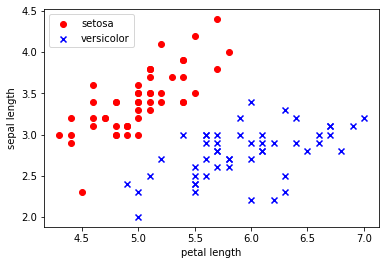

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X2[:50, 0], X2[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X2[50:100, 0], X2[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

But it is hard to plot the sonar dataset in two-dimensional scatter as it contains 60 categories.

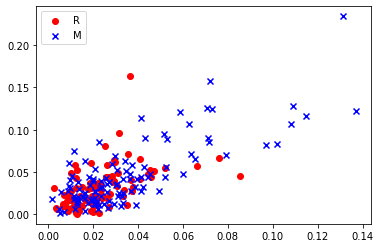

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X1[:97, 0], X1[:97, 1], color='red', marker='o', label='R')
plt.scatter(X1[97:, 0], X1[97:, 1], color='blue', marker='x', label='M')
plt.legend(loc='upper left')
plt.show()

## Task 3: Fit the models
Initialize and train our perceptron model on the sonar dataset and iris data subset.

To perform initialization and training, you can create an object from the perceptron class, and call the  __fit__ function to train the model.

We define the learning rate and epochs as 0.01 and 500 here in the sonar dataset, and all variables in __weights_and_bias__ initialize to 0. <br>
You can also try other combinations to get your result.
Different parameters could produce different outcomes.

In [20]:
#TODO:
sonar_perceptron=MyPerceptron(lr=0.01, epoch=500)
sonar_perceptron.fit(X1_train,Y1_train)

We will plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two sonar classes.

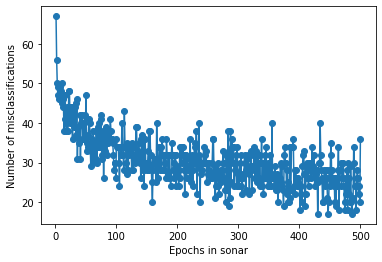

In [21]:
plt.plot(range(1, len(sonar_perceptron.errors) + 1), sonar_perceptron.errors, marker='o')
plt.xlabel('Epochs in sonar')
plt.ylabel('Number of misclassifications')
plt.show()

We define the learning rate and epochs as 0.01 and 20 here in the iris dataset, and all variables in __weights_and_bias__ initialize to 0. 

In [22]:
#TODO:
iris_perceptron=MyPerceptron(epoch=20,lr=0.01)
iris_perceptron.fit(X2_train,Y2_train)

We will plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes.

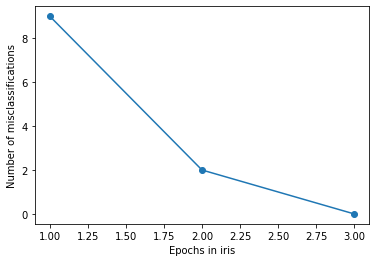

In [23]:
plt.plot(range(1, len(iris_perceptron.errors) + 1), iris_perceptron.errors, marker='o')
plt.xlabel('Epochs in iris')
plt.ylabel('Number of misclassifications')
plt.show()

## Prediction and evaluate the performance

Finally,  we can evaluate on the test set we split to check our hardworking outcome.


In [24]:
prediction=sonar_perceptron.predict(X1_test)

In [25]:
prediction2=iris_perceptron.predict(X2_test)

Following is the accuracy metric provided by sklearn. 

In [26]:
from sklearn import metrics
print("accuracy for sonar_perceptron: ",metrics.accuracy_score(Y1_test, prediction))
print("accuracy for iris_perceptron: ",metrics.accuracy_score(Y2_test, prediction2))

accuracy for sonar_perceptron:  0.7307692307692307
accuracy for iris_perceptron:  0.9666666666666667




Let us use another metric to evaluate the performance: The __F1__ score.

__F1__ score is a balance score that cares about not only precision but also recall.

In [27]:

print("F1 for sonar_perceptron: ",metrics.f1_score(Y1_test, prediction))
print("F1 for iris_perceptron: ",metrics.f1_score(Y2_test, prediction2))

F1 for sonar_perceptron:  0.6818181818181819
F1 for iris_perceptron:  0.9696969696969697


# Perceptron in sklearn
You can change the __in_weight__, __lr__, __epoch__.... and run the training process again.

With different parameter setting, you may get different accuracy socre.

As we do not need to submit this lab, I will just using the accuracy score from perceptron model under sklearn as a reference.

In [28]:
from sklearn.linear_model import Perceptron

input=X1_train
output=Y1_train
weights={0:0.1,1:0.5}
model=Perceptron(class_weight=weights, eta0=0.1)
model.fit(input,output)
prediction2=model.predict(X1_test)

In [29]:
print(metrics.accuracy_score(Y1_test, prediction2))

0.7307692307692307
